<a href="https://colab.research.google.com/github/Rimon-Roy/ML-Projects/blob/main/Image_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries for Image Compression Project
In this section, we import the necessary libraries for handling images, applying K-Means clustering, and visualizing results. Each library has a specific purpose:

* NumPy: For numerical operations and handling image arrays.
* OpenCV (cv2): For reading and manipulating images.
* Matplotlib: For visualizing the original and compressed images.
* Scikit-learn (KMeans): For performing K-Means clustering on the image pixels.

In [ ]:
# Importing necessary libraries
import numpy as np                # For handling numerical operations and image arrays
import cv2                        # For reading, displaying, and manipulating images
import matplotlib.pyplot as plt   # For visualizing images
from sklearn.cluster import KMeans # For applying K-Means clustering algorithm


# Reading and Preprocessing the Image
In this section, we load an image using OpenCV, convert it from BGR (default format in OpenCV) to RGB format, and reshape it into a 2D array where each pixel is represented by its RGB values. This preprocessing step is essential for applying machine learning algorithms, such as K-Means clustering, to group similar pixels based on color.

* Step 1: Load the image using OpenCV's imread() function.
* Step 2: Convert the image from BGR to RGB using cv2.cvtColor() for correct color representation.
* Step 3: Display the image using Matplotlib to ensure it's loaded correctly.
* Step 4: Extract the image dimensions (rows, columns, and color channels).
* Step 5: Reshape the image into a 2D array, where each row represents a pixel and each column corresponds to the R, G, B values.
This preprocessing step is crucial to prepare the image data for clustering algorithms.

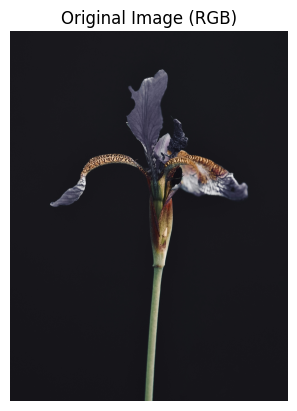

Original Image Shape: (5547, 4160, 3)
Reshaped Pixel Array Shape: (23075520, 3)


In [ ]:
# Load and preprocess the image

# Step 1: Load the image using OpenCV
image = cv2.imread('/content/Flower.jpg')  # Replace 'your_image.jpg' with the path of your image

# Step 2: Convert the image from BGR to RGB (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 3: Display the image to verify it's loaded correctly
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.title("Original Image (RGB)")
plt.show()

# Step 4: Get the dimensions of the image (rows, cols, channels)
rows, cols, channels = image_rgb.shape

# Step 5: Reshape the image into a 2D array where each pixel is represented by its RGB values
# Shape will change from (rows, cols, 3) to (rows * cols, 3)
pixels = image_rgb.reshape((-1, 3))

# Output the shape of the reshaped pixel array to verify
print(f"Original Image Shape: {image_rgb.shape}")
print(f"Reshaped Pixel Array Shape: {pixels.shape}")


# Performance Optimization by Resizing the Image
In this step, we optimize performance by resizing the image if it's too large, which can speed up the clustering process. Resizing reduces the number of pixels, thus lowering the computational complexity when applying K-Means clustering.

* Why Resize: Large images have a high number of pixels, and processing each pixel can be computationally expensive. By resizing the image to a smaller resolution, we reduce the number of pixels and speed up the processing, with minimal impact on the final result.

* Resizing with OpenCV: We use OpenCV’s cv2.resize() function to downscale the image to a specified size (e.g., 50% of the original dimensions).

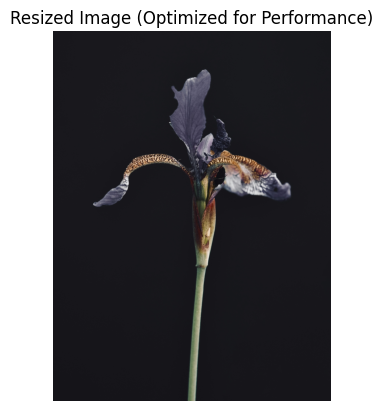

Resized Image Shape: (2773, 2080, 3)
Reshaped Pixel Array Shape (after resizing): (5767840, 3)


In [ ]:
# Performance Optimization: Resize the image if necessary

# Step 1: Define the scale factor for resizing (e.g., 50% of the original size)
scale_percent = 50  # Resize to 50% of the original dimensions

# Step 2: Calculate the new dimensions of the image
new_width = int(cols * scale_percent / 100)
new_height = int(rows * scale_percent / 100)
new_dim = (new_width, new_height)

# Step 3: Resize the image using OpenCV's resize function
resized_image = cv2.resize(image_rgb, new_dim, interpolation=cv2.INTER_AREA)

# Step 4: Display the resized image
plt.imshow(resized_image)
plt.axis('off')  # Hide axes
plt.title("Resized Image (Optimized for Performance)")
plt.show()

# Step 5: Get the dimensions of the resized image (rows, cols, channels)
resized_rows, resized_cols, resized_channels = resized_image.shape

# Step 6: Reshape the resized image into a 2D array for further processing
resized_pixels = resized_image.reshape((-1, 3))

# Output the shape of the resized image and reshaped pixel array to verify
print(f"Resized Image Shape: {resized_image.shape}")
print(f"Reshaped Pixel Array Shape (after resizing): {resized_pixels.shape}")


# Applying K-Means Clustering to Compress the Image
In this step, we use the K-Means clustering algorithm to reduce the number of colors in the image by grouping similar pixels into clusters. Each cluster represents a dominant color, and each pixel is assigned to the nearest cluster. This step is crucial for compressing the image while maintaining visual quality.

* K (Number of Clusters): The number of clusters K determines how many distinct colors will be in the compressed image. A smaller K value results in fewer colors (more compression), while a larger K value retains more color details.

* K-Means: Scikit-learn’s KMeans class is used to apply the clustering algorithm, which groups similar pixels based on their RGB values.

In [ ]:
# Applying K-Means Clustering to compress the image

# Step 1: Define the number of clusters (K)
K = 16  # Choose the number of clusters (e.g., 16 colors)

# Step 2: Initialize the KMeans model from scikit-learn
kmeans = KMeans(n_clusters=K)

# Step 3: Apply K-Means clustering on the pixel data (RGB values)
kmeans.fit(resized_pixels)  # 'resized_pixels' from the previous step (reshaped image)

# Step 4: Get the cluster centers (the new colors) and labels for each pixel
new_colors = kmeans.cluster_centers_.astype(int)  # Cluster centers are the colors of the compressed image
labels = kmeans.labels_  # Labels indicate which cluster each pixel belongs to

# Step 5: Output the cluster centers (new colors) and labels
print(f"Cluster Centers (New Colors): \n{new_colors}")
print(f"Labels Shape: {labels.shape}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers (New Colors): 
[[ 25  25  29]
 [156 154 154]
 [ 76  75  94]
 [158 143 110]
 [189 182 175]
 [113  81  54]
 [ 41  41  49]
 [ 95  93 112]
 [ 59  59  75]
 [189 168 136]
 [ 22  22  27]
 [122 121 133]
 [106 122  90]
 [148 112  77]
 [217 210 204]
 [ 79  48  33]]
Labels Shape: (5767840,)


## Explanation:
1. Define Number of Clusters (K): K is set to 16 in this example. You can experiment with different values like 8, 16, 32, depending on the level of compression you want.

2. KMeans Initialization: We initialize the KMeans model with the desired number of clusters using n_clusters=K.

3. Fitting the Model: The fit() function is applied to the pixel array (resized_pixels), which contains the RGB values of each pixel. This groups the pixels into K clusters.

Cluster Centers and Labels:

* Cluster Centers: These represent the colors of each cluster (compressed image colors).
* bLabels: Each pixel is assigned a label indicating which color (cluster) it belongs to.

Impact of K:
* A lower K value (e.g., 8) will lead to higher compression but fewer colors, which may reduce the image quality.
* A higher K value (e.g., 32) will retain more colors, resulting in better image quality but less compression.

# Reconstructing the Compressed Image
In this step, we reconstruct the compressed image by replacing each pixel in the original image with the centroid (cluster center) of the cluster it belongs to. Afterward, we reshape the pixel array back to the original image dimensions to visualize the compressed image.

Steps:
1. Replace Pixels with Cluster Centroids: For each pixel, we replace its RGB values with the RGB values of its assigned cluster's centroid.
2. Reshape the 2D Array: The pixel array is then reshaped back into the original image dimensions (height, width, and color channels).
3. Visualize the Compressed Image: Display the compressed image to see the result of the clustering-based compression.

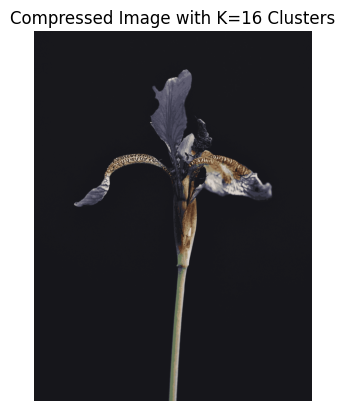

Compressed Image Shape: (2773, 2080, 3)


In [ ]:
# Reconstructing the compressed image

# Step 1: Replace each pixel with the color of the centroid (cluster center) it belongs to
compressed_pixels = new_colors[labels]

# Step 2: Reshape the compressed pixel array back to the original image dimensions
# Reshape from (rows * cols, 3) to (rows, cols, 3) for image display
compressed_image = compressed_pixels.reshape((resized_rows, resized_cols, 3))

# Step 3: Display the compressed image to visualize the results
plt.imshow(compressed_image)
plt.axis('off')  # Hide axes
plt.title(f"Compressed Image with K={K} Clusters")
plt.show()

# Output the shape of the compressed image to verify
print(f"Compressed Image Shape: {compressed_image.shape}")


## Explanation:
1. Replace Pixels with Centroid Colors: We use the labels to index into the new_colors (the cluster centers) and replace each pixel's RGB values with the RGB values of the cluster centroid it was assigned to.

2. Reshape the Pixel Array: The compressed_pixels array, which is of shape (rows * cols, 3), is reshaped back to (rows, cols, 3) so that we can display it as an image.

3. Display the Compressed Image: We use Matplotlib’s imshow() to visualize the newly compressed image.

Result:
* The compressed image will have a limited number of colors (equal to K) but still resemble the original.
* By adjusting the number of clusters (K), you can control the level of compression.

# Saving the Compressed Image
In this step, we will save the compressed image after reconstructing it. If using OpenCV, the image needs to be converted back to the BGR format (since OpenCV uses BGR as the default color format). We’ll then save the image using cv2.imwrite().

Steps:
1. Convert to BGR Format: If using OpenCV for image processing, convert the RGB image back to BGR.
2. Save the Image: Use cv2.imwrite() to save the compressed image to a file.

In [ ]:
# Saving the compressed image

# Step 1: Convert the compressed image from RGB back to BGR (if using OpenCV)
compressed_image_bgr = cv2.cvtColor(compressed_image.astype('uint8'), cv2.COLOR_RGB2BGR)

# Step 2: Save the compressed image using OpenCV's imwrite function
output_filename = 'compressed_image_kmeans.jpg'  # Specify the output file name
cv2.imwrite(output_filename, compressed_image_bgr)

print(f"Compressed image saved as {output_filename}")


Compressed image saved as compressed_image_kmeans.jpg


# Experimenting with Different K Values
In this step, we’ll experiment with various values of K (the number of clusters) to observe how different levels of compression affect the image quality. We will automate the process using a for-loop to apply K-Means clustering with different values of K (e.g., 8, 16, 32) and visualize the compressed image for each.

Steps:
1. Iterate Over Different K Values: Use a for-loop to apply K-Means clustering with different K values.
2. Reconstruct and Save the Image: For each K, reconstruct the image and observe the effect on quality and compression.
3. Display and Save the Results: Visualize and save each compressed image.

Applying K-Means with K=8...


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Compressed image saved as compressed_image_kmeans_K8.jpg


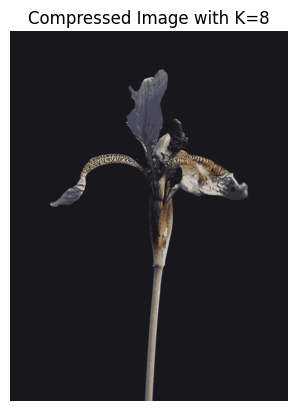

Applying K-Means with K=16...


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Compressed image saved as compressed_image_kmeans_K16.jpg


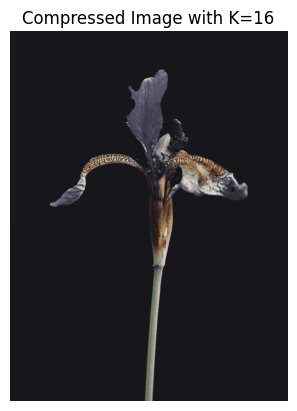

Applying K-Means with K=32...


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Compressed image saved as compressed_image_kmeans_K32.jpg


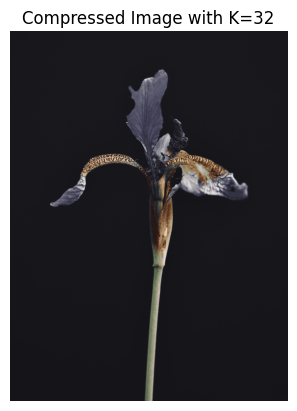

In [ ]:
# Experiment with different K values
k_values = [8, 16, 32]  # Different values of K to test

for K in k_values:
    print(f"Applying K-Means with K={K}...")

    # Step 1: Initialize the KMeans model with the current K
    kmeans = KMeans(n_clusters=K)

    # Step 2: Apply K-Means clustering on the pixel data
    kmeans.fit(resized_pixels)

    # Step 3: Get the new colors (cluster centers) and labels
    new_colors = kmeans.cluster_centers_.astype(int)
    labels = kmeans.labels_

    # Step 4: Reconstruct the compressed image
    compressed_pixels = new_colors[labels]
    compressed_image = compressed_pixels.reshape((resized_rows, resized_cols, 3))

    # Step 5: Convert the image back to BGR format for saving
    compressed_image_bgr = cv2.cvtColor(compressed_image.astype('uint8'), cv2.COLOR_RGB2BGR)

    # Step 6: Save the compressed image
    output_filename = f'compressed_image_kmeans_K{K}.jpg'
    cv2.imwrite(output_filename, compressed_image_bgr)
    print(f"Compressed image saved as {output_filename}")

    # Step 7: Display the compressed image
    plt.imshow(compressed_image)
    plt.axis('off')  # Hide axes
    plt.title(f"Compressed Image with K={K}")
    plt.show()


# Calculating Peak Signal-to-Noise Ratio (PSNR) to Measure Compression Quality
In this step, we calculate the Peak Signal-to-Noise Ratio (PSNR) to quantify the difference between the original and compressed images. PSNR is a widely used metric for evaluating image compression quality. Higher PSNR values indicate better quality (less distortion), while lower values indicate greater loss in quality.

Steps:
1. Mean Squared Error (MSE): First, calculate the Mean Squared Error (MSE) between the original and compressed images.
2. PSNR Formula: Use the formula PSNR = 20 * log10(MAX_pixel / sqrt(MSE)), where MAX_pixel is the maximum possible pixel value (usually 255 for 8-bit images).
3. Compare the Original and Compressed Images: Apply the PSNR metric to compare the difference between the original and each compressed image.

In [ ]:
import cv2
import numpy as np

# Function to calculate PSNR
def calculate_psnr(original_image, compressed_image):
    # Step 1: Compute the Mean Squared Error (MSE) between the original and compressed image
    mse = np.mean((original_image - compressed_image) ** 2)

    if mse == 0:
        return float('inf')  # If images are identical, PSNR is infinite

    # Step 2: Define the maximum pixel value (for 8-bit images, it's 255)
    max_pixel_value = 255.0

    # Step 3: Calculate PSNR using the formula
    psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))

    return psnr

# Convert original image to BGR if necessary (for OpenCV comparison)
original_image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)  # Original image in BGR format

# Loop through compressed images and calculate PSNR for each
for K in k_values:
    # Load the compressed image for each K value
    compressed_image_bgr = cv2.imread(f'compressed_image_kmeans_K{K}.jpg')

    # Step 1: Resize original image to match the compressed image size
    resized_original_image = cv2.resize(original_image_bgr, (compressed_image_bgr.shape[1], compressed_image_bgr.shape[0]))

    # Step 2: Calculate PSNR between the resized original and compressed image
    psnr_value = calculate_psnr(resized_original_image, compressed_image_bgr)

    # Display the PSNR value
    print(f"PSNR for K={K}: {psnr_value} dB")


PSNR for K=8: 38.3342336744614 dB
PSNR for K=16: 39.81065381892296 dB
PSNR for K=32: 41.19988285566442 dB


## Explanation:
1. Calculate MSE: The Mean Squared Error (MSE) between the original image and the compressed image is computed. MSE measures the average squared differences between pixel intensities.

2. PSNR Formula: PSNR is calculated using the formula:

$$
\text{PSNR} = 20 \times \log_{10} \left( \frac{\text{MAX\_pixel}}{\sqrt{\text{MSE}}} \right)
$$

* MAX_pixel: The maximum possible pixel value (255 for 8-bit images).
* Higher PSNR values indicate better image quality after compression.
3. Handling Identical Images: If the original and compressed images are identical (MSE = 0), the PSNR value will be infinite, meaning there’s no loss in quality.

4. Display PSNR: For each value of K, the PSNR value is calculated and printed to quantify the quality of the compressed image.

## Result:
* Higher PSNR values: Indicate better image quality and less distortion.
* Lower PSNR values: Indicate more compression artifacts and a greater loss in image quality.

# Visualization and Comparison of Original and Compressed Images
In this step, we'll visualize the original and compressed images side by side for a direct visual comparison. Additionally, we’ll compare the file sizes of the original and compressed images to evaluate the degree of compression.

Steps:
1. Display Images Side by Side: Use Matplotlib to display the original and compressed images in a single figure for easy visual comparison.
2. Compare File Sizes: Check the file sizes of the original and compressed images to evaluate the level of compression.

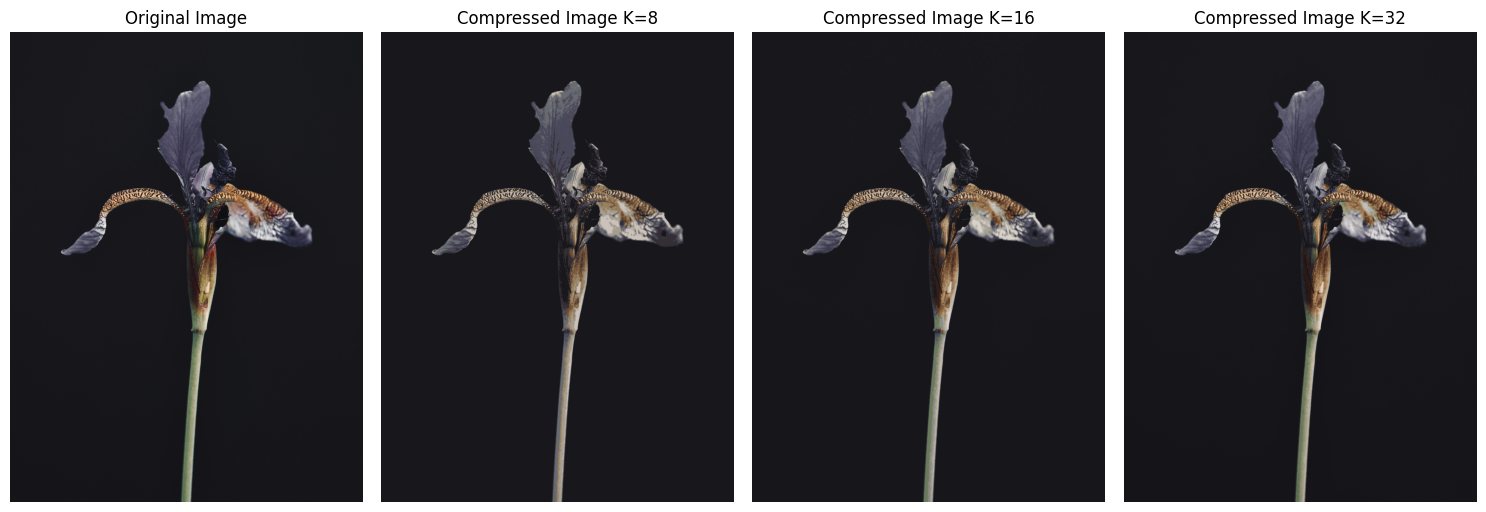

Original Image File Size: 1.62 MB
Compressed Image File Size: 0.38 MB
Compressed Image File Size: 0.62 MB
Compressed Image File Size: 0.80 MB


In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Function to get file size
def get_file_size(file_path):
    if os.path.exists(file_path):
        return os.path.getsize(file_path) / (1024 * 1024)  # File size in MB
    else:
        return None

# Display the original and compressed images side by side
def display_images(original_image, compressed_images, k_values):
    # Create a figure with subplots
    fig, axes = plt.subplots(1, len(compressed_images) + 1, figsize=(15, 5))

    # Display the original image
    axes[0].imshow(original_image)
    axes[0].set_title("Original Image")
    axes[0].axis('off')  # Hide axes

    # Display each compressed image
    for i, (compressed_image, K) in enumerate(zip(compressed_images, k_values)):
        axes[i + 1].imshow(compressed_image)
        axes[i + 1].set_title(f"Compressed Image K={K}")
        axes[i + 1].axis('off')  # Hide axes

    # Show the figure
    plt.tight_layout()
    plt.show()

# Paths to images
original_image_path = '/content/Flower.jpg'  # Correct path for the original image
compressed_image_paths = [f'/content/compressed_image_kmeans_K{K}.jpg' for K in k_values]  # Update with paths where compressed images are saved

# Load and display images
original_image_bgr = cv2.cvtColor(cv2.imread(original_image_path), cv2.COLOR_BGR2RGB)  # Convert original image to RGB for displaying
compressed_images = []
for path in compressed_image_paths:
    compressed_image_bgr = cv2.imread(path)
    if compressed_image_bgr is not None:
        compressed_image_rgb = cv2.cvtColor(compressed_image_bgr, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying
        compressed_images.append(compressed_image_rgb)
    else:
        print(f"Compressed image not found: {path}")

# Display the images side by side
display_images(original_image_bgr, compressed_images, k_values)

# Compare file sizes
original_file_size = get_file_size(original_image_path)
if original_file_size is not None:
    print(f"Original Image File Size: {original_file_size:.2f} MB")
else:
    print("Original image file not found.")

for path in compressed_image_paths:
    compressed_file_size = get_file_size(path)
    if compressed_file_size is not None:
        print(f"Compressed Image File Size: {compressed_file_size:.2f} MB")
    else:
        print(f"Compressed image file not found: {path}")


# Explore Alternative Clustering Algorithms
After completing the K-Means clustering approach, you can experiment with alternative clustering algorithms to see how they perform for image compression. Below, I'll provide code examples for Agglomerative Clustering and DBSCAN using scikit-learn.

Steps:
1. Apply Agglomerative Clustering: Perform hierarchical clustering to group similar pixels.
2. Apply DBSCAN: Perform density-based clustering to group similar pixels based on density.

## 1. Agglomerative Clustering
Agglomerative Clustering is a hierarchical clustering method that builds clusters by successively merging pairs of clusters. It does not require specifying the number of clusters in advance.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Function to apply Agglomerative Clustering
def apply_agglomerative_clustering(pixels, n_clusters):
    # Initialize Agglomerative Clustering
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')

    # Fit and predict cluster labels
    labels = agglomerative.fit_predict(pixels)

    return labels

# Apply Agglomerative Clustering with different K values
for K in k_values:
    labels = apply_agglomerative_clustering(pixels, n_clusters=K)

    # Replace each pixel with the color of its cluster center
    compressed_pixels = np.array([np.mean(pixels[labels == i], axis=0) for i in range(K)])
    compressed_image = compressed_pixels[labels].reshape((rows, cols, 3))

    # Convert back to BGR and save the image
    compressed_image_bgr = cv2.cvtColor(compressed_image.astype(np.uint8), cv2.COLOR_RGB2BGR)
    cv2.imwrite(f'/content/agglomerative_image_K{K}.jpg', compressed_image_bgr)

    # Optionally display the result
    plt.imshow(compressed_image)
    plt.axis('off')
    plt.title(f"Agglomerative Clustering K={K}")
    plt.show()


## 2. DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups pixels based on their density. It can handle clusters of arbitrary shapes and does not require specifying the number of clusters in advance.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Load and preprocess the image
image_path = '/content/Flower.jpg'
image = cv2.imread(image_path)

# Convert image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get the dimensions of the image and reshape it
rows, cols, channels = image_rgb.shape
pixels = image_rgb.reshape((-1, 3))

# Function to apply DBSCAN
def apply_dbscan(pixels, eps, min_samples):
    # Initialize DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    # Fit and predict cluster labels
    labels = dbscan.fit_predict(pixels)

    return labels

# Apply DBSCAN with chosen eps and min_samples parameters
eps = 20  # Maximum distance between samples to be considered as in the same neighborhood
min_samples = 50  # Minimum number of samples to form a cluster
labels = apply_dbscan(pixels, eps, min_samples)

# Get unique clusters and colors
unique_labels = np.unique(labels)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)  # Exclude noise (-1)

# Create a color map for the clusters
if num_clusters > 0:
    # Map each pixel to the cluster center color
    compressed_pixels = np.array([np.mean(pixels[labels == i], axis=0) for i in unique_labels if i != -1])
    compressed_image = compressed_pixels[labels[labels != -1]].reshape((rows, cols, 3))

    # Convert back to BGR and save the image
    compressed_image_bgr = cv2.cvtColor(compressed_image.astype(np.uint8), cv2.COLOR_RGB2BGR)
    cv2.imwrite(f'/content/dbscan_image.jpg', compressed_image_bgr)

    # Optionally display the result
    plt.imshow(compressed_image)
    plt.axis('off')
    plt.title("DBSCAN Clustering")
    plt.show()
else:
    print("No clusters were found using DBSCAN.")
